# Homework 1

## Exo 1

### a)

In [43]:
alpha = 3
beta = 4
x = c(2,0,1)

estimation <- function(x,alpha,beta,k){
    alpha_post = alpha + sum(x)
    beta_post = beta + length(x)
    
    return (dnbinom(c(0,1,2,3,4),alpha_post,beta_post/(1+beta_post)))
}

In [44]:
es = estimation(x,alpha,beta,4)
es

[1] 0.44879532 0.33659649 0.14726096 0.04908699 0.01380572

In [45]:
1-sum(es)

[1] 0.004454525

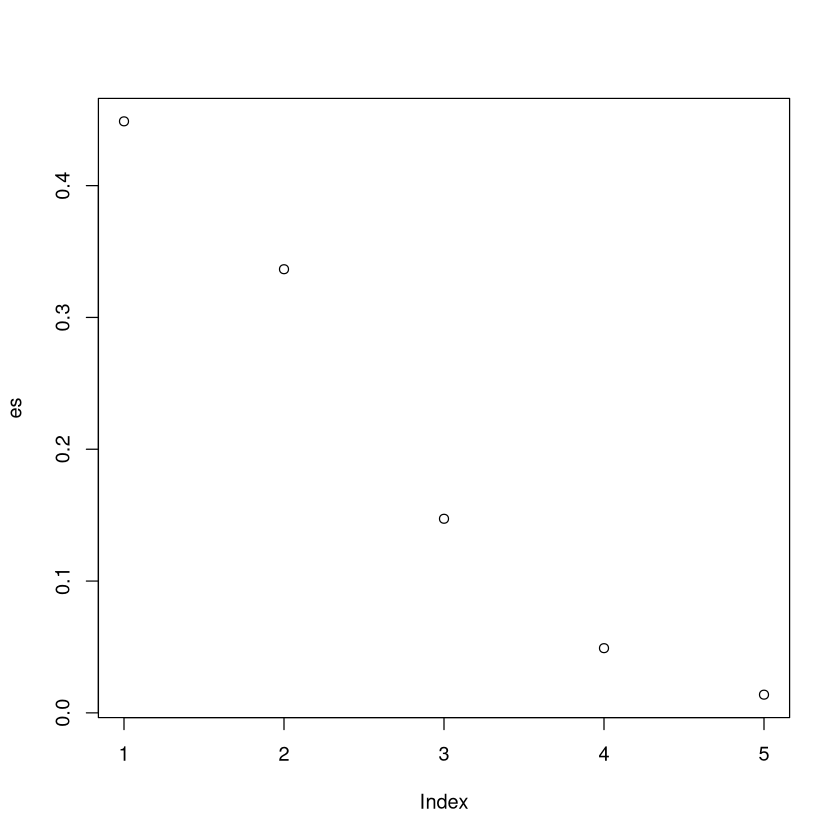

In [109]:
plot(es)

### b)

In [79]:
N = 1000000
alpha = 3
beta = 4

In [99]:
simu <- function(lbd, size) {
  y <- array(0, dim=c(length(lbd),size))
  for (i in 1:length(lbd)) {
    y[i,] <- rpois(size, lbd[i])
  }
  return(y)
}

lbd <- rgamma(N, alpha, beta)
y <- simu(lbd,1)
lbd2 <- lbd[y == 2]

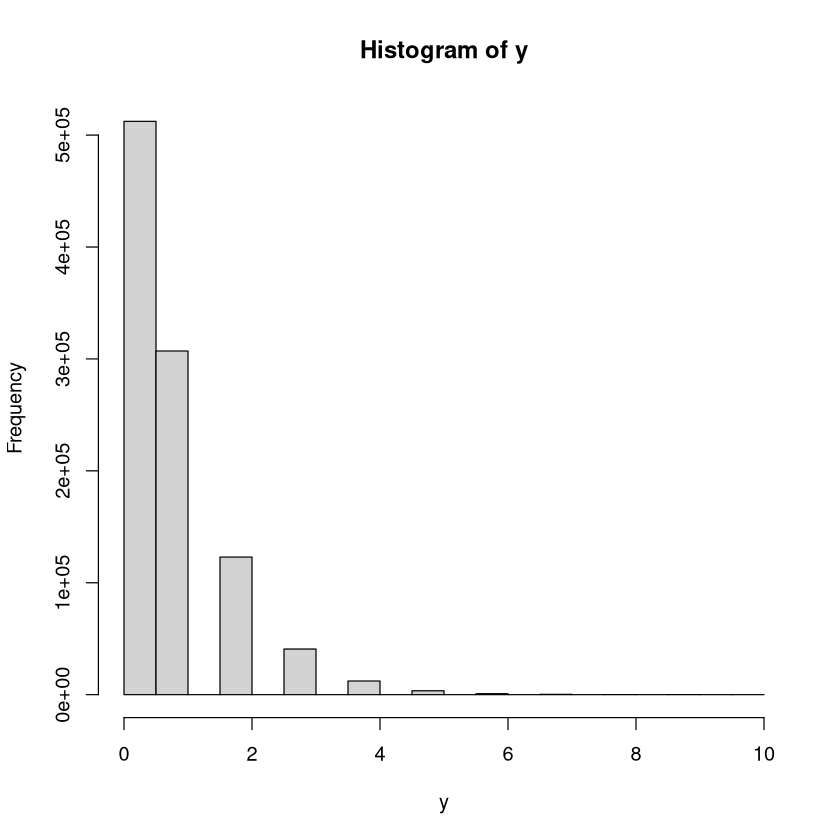

In [100]:
hist(y)

In [142]:
lbd <- rgamma(N, alpha, beta)
y <- simu(lbd, 3)
lbd201 <- lbd[y[,1]== 2 & y[,2]== 0 & y[,3]== 1]

In [143]:
length(lbd201)

[1] 16321

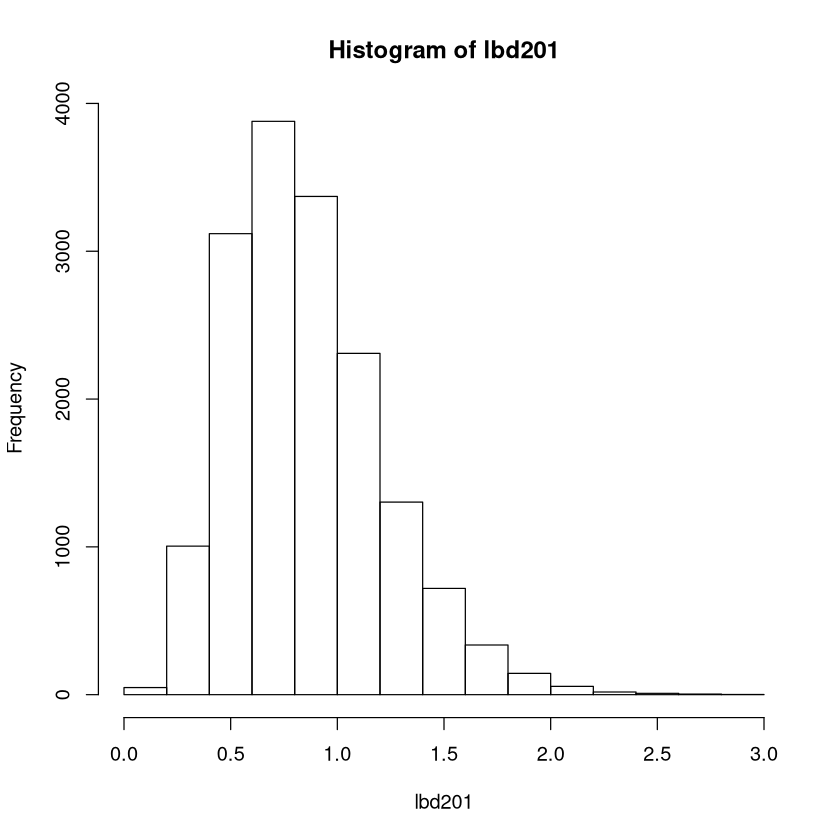

In [144]:
h1 = hist(lbd201,plot=FALSE)
h2 = hist(lbd,plot=FALSE)
plot(h1)

In [145]:
y201 = simu(lbd201,1)

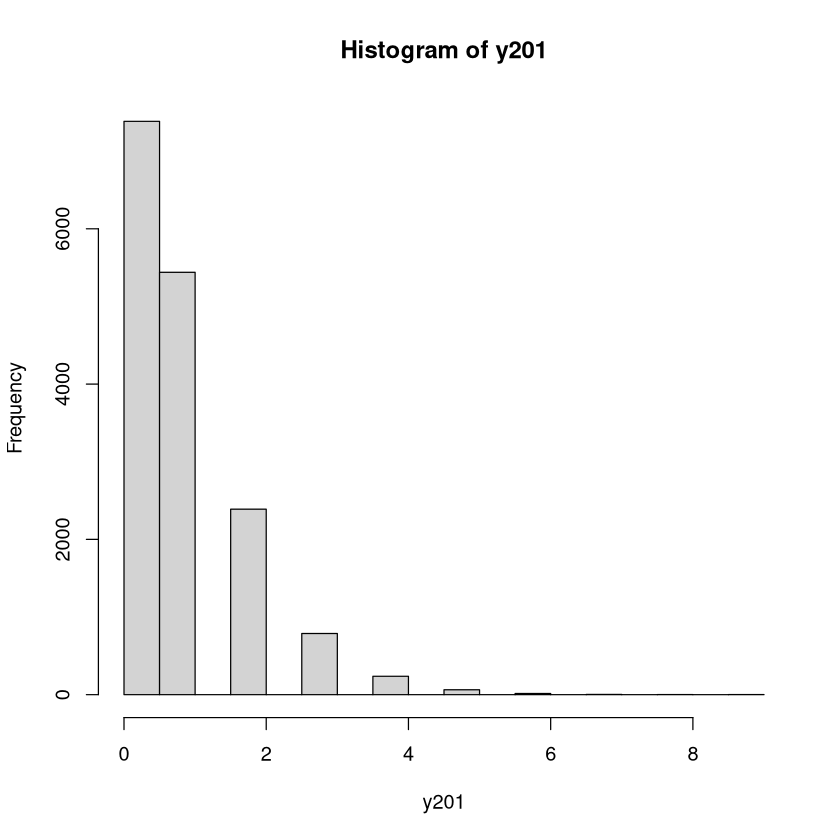

In [147]:
hist(y201)

### e)

In [23]:
f_down <- function(x_old,lambda,alpha,beta){
    
    y = 1
    
    for ( i in 1:length(x_old)){
        y = y*dpois(x_old[i],lambda)
    }
    
    y = y*dgamma(lambda, alpha, beta)
    
    return (y)
}


f_up <- function(x_new,x_old,lambda,alpha,beta) {
    y = dpois(x_new,lambda)
    
    y = y*f_down(x_old,lambda,alpha,beta)
    
    return (y)
}

In [97]:
pi <- function(x_new,x_old,alpha,beta){
    
    f1 <- function(lambda){
        return (f_up(x_new,x_old,lambda,alpha,beta))
    }
    
    f2 <- function(lambda){
        return (f_down(x_old,lambda,alpha,beta))
    }
    
    max_int = 1000
    
   return (integrate(f1,0,max_int)$value/integrate(f2,0,max_int)$value)

}

In [ ]:
lambdas= seq(0,10)
y <- array(0, dim=c(length(lambdas),1))
for (i in 1:length(lambdas)){
    y[i] <-  f_down(x_old,lambdas[i],alpha,beta)
}

In [98]:
x_old = c(2,0,1)
x_new = 0

In [99]:
f_down(x_old,1,alpha,beta)
f_up(x_new,x_old,1,alpha,beta)

[1] 0.01459011

[1] 0.005367402

In [102]:
pi(x_new,x_old,alpha,beta)

[1] 0.4487953

In [104]:
x_new_list = c(0,1,2,3,4)
p <- array(0, dim=c(length(x_new_list),1))
for (i in 1:length(x_new_list)){
    p[i] <-  pi(x_new_list[i],x_old,alpha,beta)
}
p

0.448795318
0.336596489
0.147260964
0.049086988
0.003210471


## Exo2

In [5]:
c(1,2 ,
 3,4)

[1] 1 2 3 4

In [11]:
Q = matrix( 
  c(0,1,1,1,1,0,0,0,0,
    0,0,1,1,1,1,0,0,0,
    0,0,0,0,0,0,0,4,0,
    0,0,0,0,1,1,1,1,0,
    0,0,0,0,0,1,1,1,1,
    0,0,0,4,0,0,0,0,0,
    0,0,0,0,0,0,1,1,1,
    0,0,0,0,0,0,0,2,1,
    0,0,0,0,4,0,0,0,0
   ), # the data elements 
   nrow=9,              # number of rows 
   ncol=9,
   byrow = TRUE
   # number of columns 
)/4

In [21]:
F = solve(diag(9)-Q)

In [22]:
F%*% (diag(9)-Q)

1,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
0,1,0,0,0.000000e+00,0.000000e+00,0.000000e+00,-2.220446e-16,0
0,0,1,0,-2.220446e-16,5.551115e-17,5.551115e-17,-2.220446e-16,0
0,0,0,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
0,0,0,0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
0,0,0,0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0
0,0,0,0,-2.220446e-16,5.551115e-17,1.000000e+00,0.000000e+00,0
0,0,0,0,-2.220446e-16,5.551115e-17,5.551115e-17,1.000000e+00,0
0,0,0,0,-4.440892e-16,1.110223e-16,1.110223e-16,0.000000e+00,1


In [24]:
A  =F%*% c(1,1,1,1,1,1,1,1,1)

In [25]:
A

11.38281
11.40625
8.87500
10.50000
10.75000
11.50000
7.87500
7.87500
11.75000


In [27]:
A[1]

[1] 11.38281

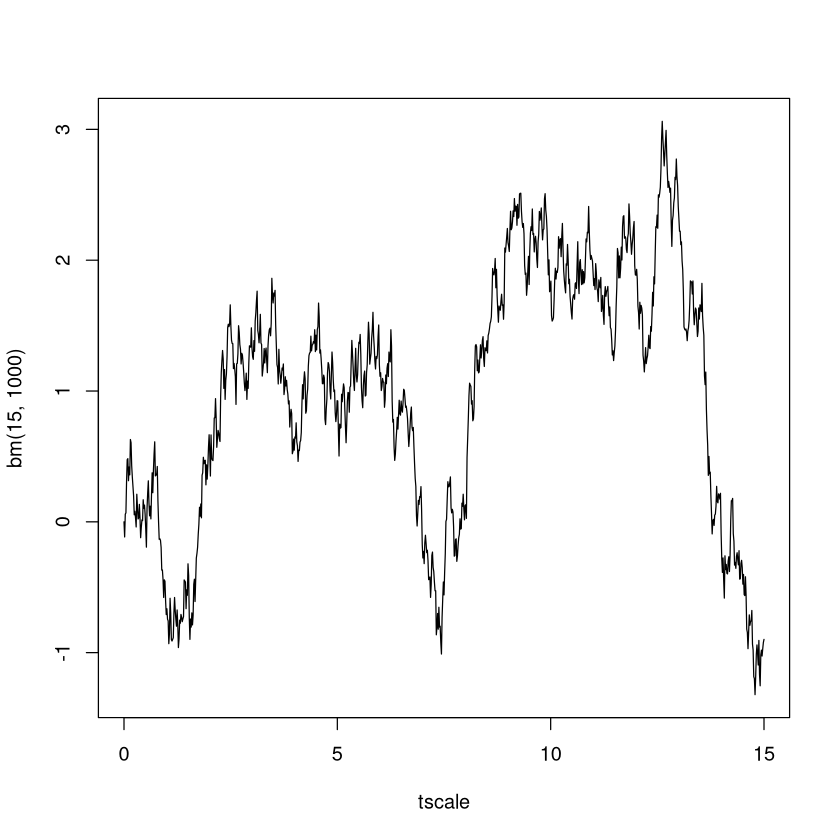

In [30]:
source("book/utilities.R")

In [46]:
F[6,3]

[1] 0